# Dynamic Programming

## Asset Market Equilibrium

Question A: Define a financial market equilibrium and the system of equations

__Definitions__:

* $A_{h a}$ : the amount of asset a hold by agent h  
* $r_{a s}$ : the realisation of asset a in state s  
* $C_{h}^{t}$: the consumption of agent h in period t  
* $e_{h s}^{t}$: the endowment of agent h in period t in state s  
* $p_{a}$: the price of asset a  
      
      

__The financial market equilibrium__  assuming that we are in a close  can be summarized by the following system of equations:  
* $A_{1 1}$ + $A_{2 1}$ = 0  
* $A_{1 2}$ + $A_{2 2}$ = 0  
      
__The agents' problem and the resulting FOC__  
For each agent $h$ the maximization problem is the following:  
      
$ Max_{A_{h 1}  A_{h_2}} U_c$ = $\frac{C_{h}^{0} .^{1-\sigma}}{1-\sigma}$ + $\frac{1}{4}$ $\sum_{S=1}^{4} {\frac{C_{h}^{1(s)} .^{1-\\sigma}}{1-\sigma}}$  
      
__s.t. (budget constraints in periods 0 and 1)__  
      
* $e_{h}^{0} = C_{h}^{0} + A_{h,1}*p_1 + A_{h,2}*p_2$  
* $e_{h,s}^{1} + r_{1,s}*A_{h,1} + r_{2 s}*A_{h,2}= C_{h}^{1}$  
      
      
__Reorganizing:__  
      
$Max_{A_{h,1}, A_{h,2}} U_c$ = $\frac{(e_{h}^{0} - A_{h,1}*p_1 -A_{h,2}*p_2$) .^{1-\sigma}}{1-\sigma}$ + $\frac{1}{4}$ $\sum_{S=1}^{4} {\frac{(e_{h}^{1} + r_{1,s}*A_{h,1} + r_{2,s}*A_{h,2}) .^{1-\sigma}}{1-\sigma}}$

__Resulting in the following FOC conditions (similar for each agent h) wrt $A_{h,1}$ and $A_{h,2}$:__  

Asset 1:   

* $ -p_{1} . {(e_{h}^{0} - A_{h,1}*p_1 -A_{h,2}*p_2) .^{-\sigma}}$ + $\frac{1}{4}$ . $\sum_{s=1}^{4}$ $r_{1,s} {(e_{h}^{1} + r_{1,s}*A_{h,1} + r_{2,s}*A_{h,2}}) ^{- \sigma}$  
      
Asset 2:   
      
* $ -p_{2} . {(e_{h}^{0} - A_{h,1}*p_1 -A_{h,2}*p_2) .^{-\sigma}}$ + $\frac{1}{4}$ . $\sum_{s=1}^{4}$ $r_{2,s} {(e_{h}^{1} + r_{2 s}*A_{h,1} + r_{2 s}*A_{h,2}}) ^{- \sigma}$  
      
      
      
__With 2 agents and 2 assets we therefore have a non-linear system of 6 equations and 6 unknowns. Namely:__  
      
* $ -p_{1} . {(e_{1}^{0} - A_{1 1}*p_1 -A_{1 2}*p_2) .^{-\sigma}}$ + $\frac{1}{4}$ . $\sum_{s=1}^{4}$ $r_{1 s} {(e_{1 s}^{1} + r_{1 s}*A_{1 1} + r_{2 s}*A_{1 2}}) ^{- \\sigma}$  
* $ -p_{2} . {(e_{1}^{0} - A_{1 1}*p_1 -A_{1 2}*p_2) .^{-\sigma}}$ + $\frac{1}{4}$ . $\sum_{s=1}^{4}$ $r_{2 s} {(e_{1 s}^{1} + r_{1 s}*A_{1 1} + r_{2 s}*A_{1 2}}) ^{- \sigma}$  
* $ -p_{1} . {(e_{2}^{0} - A_{2 1}*p_1 -A_{2 2}*p_2) .^{-\sigma}}$ + $\frac{1}{4}$ . $\sum_{s=1}^{4}$ $r_{1 s} {(e_{2 s}^{1} + r_{1 s}*A_{2 1} + r_{2 s}*A_{2 2}}) ^{- \sigma}$  
* $ -p_{2} . {(e_{2}^{0} - A_{2 1}*p_1 -A_{2 2}*p_2) .^{-\sigma}}$ + $\frac{1}{4}$ . $\sum_{s=1}^{4}$ $r_{2 s} {(e_{2 s}^{1} + r_{1 s}*A_{2 1} + r_{2 s}*A_{2 2}}) ^{- \sigma}$  
* $A_{1 1}$ + $A_{2 1}$ = 0  
* $A_{1 2}$ + $A_{2 2}$ = 0  
      
     

In [90]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import math
     
from scipy.stats import norm

In [91]:
# Initialize (pb set specific)
e1 = np.array([1, 1, 2, 1, 2])
e2 = np.array([1, 3, 1, 3, 1])
r1 = np.array([1, 1, 1, 1])
r2 = np.array([1, 1, 1.5, 1.5])


def solve_asset_market_eq(e1, e2, r1, r2, γ):

    parameters = (e1, e2, r1, r2)

# System of equations  
    def system(x,*parameters):
        p1, p2, A11, A12, A21, A22 = x
        e1,e2,r1,r2 = parameters
        return [A11 + A21, A12 + A22, \
    -p1*(e1[0] - p1*A11 - p2*A12)**(-γ) + \
     1/4*np.sum(r1*(e1[1:] + r1*A11 + r2*A12)**(-γ)),\
     -p2*(e1[0] - p1*A11 - p2*A12)**(-γ) + \
     1/4*np.sum(r2*(e1[1:] + r1*A11 + r2*A12)**(-γ)),\
     -p1*(e2[0] - p1*A21 - p2*A22)**(-γ) + \
     1/4*np.sum(r1*(e2[1:] + r1*A21 + r2*A22)**(-γ)),\
     -p2*(e2[0] - p1*A21 - p2*A22)**(-γ) + \
     1/4*np.sum(r2*(e2[1:] + r1*A21 + r2*A22)**(-γ))]
   
    guess = np.array([1, 0, -0.5, 0.5, 0, 0])
    parameters = (e1, e2, r1, r2)
    sol = sp.optimize.root(system, guess, method = 'hybr', args=(parameters))
    
#print(sol.x)

    return(sol.x)

solve_asset_market_eq(e1, e2, r1, r2, np.array([2.0]))

array([ 5.89777656e-01,  7.37222070e-01,  1.95406655e-02,  8.48525250e-12,
       -1.95406655e-02, -8.48525249e-12])

## Ramsey I

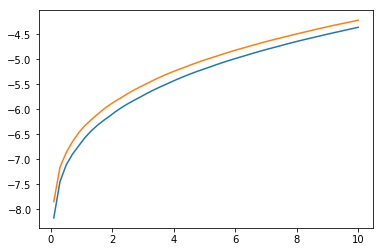

In [93]:

# Choose parameters
n=50
k = np.linspace(0.1,10,n)
V_guess = np.zeros((2, len(k)))
β = 0.9
tol = 1e-6


def utility(x):
    if x > 0:
        return np.log(x)
    else:
        return -5000

# Update the value function
## Define the 2 value functions
T1 = lambda i, j: utility(0.9*k[i]**0.3 + 0.3*k[i] - k[j]) + β *(0.5 *V_guess[0,j] + 0.5 * V_guess[1,j])
T2 = lambda i, j: utility(1.1*k[i]**0.3 + 0.3*k[i] - k[j]) + β *(0.5 *V_guess[0,j] + 0.5 * V_guess[1,j])

# to loop over all i
# artificially i = 1
iter = 0
while True:
    iter +=1

    All_T1 = np.zeros((len(k), len(k)))
    All_T2 = np.zeros((len(k), len(k)))
    for i in range(len(k)):
        for j in range(len(k)):
            All_T1[i,j] = T1(i,j) 
            All_T2[i,j] = T2(i,j) 

    # Compute max value function
    # For all k, choose the best k+1 (saving in the future, given k[i], represented by k[j])
    V1 = np.amax(All_T1, axis=1)
    V2 = np.amax(All_T2, axis=1)

    # Check that improvement
    # Want to compute the norm of the error (magnitude of the error)
    e1 = np.linalg.norm(V1 - V_guess[0,:])
    e2 = np.linalg.norm(V2 - V_guess[1,:])
    e = e1 + e2
    #print(e)
    if e < tol:
        break

    V_guess[0,:] = V1
    V_guess[1,:] = V2

#print(\Nb iterations\, \\\t\, iter, \\\n\, \error\, \\\t\, e)

plt.plot(k, V_guess[0,:])
plt.plot(k, V_guess[1,:])

plt.show()


## Stochastic Ramsey Model: time iteration collocation

### Discrete Shocks

##### Linear Piecewise Collocation

* Piecewise linear collocation = global method to solve the Ramsey problem
* Criterion: the solution satisfies the EE exactly on a grid of points rather than only at the SS
* We choose n points and interpolate linearly between these points


In [201]:


# Initial Step: set grid, initial policy and error tolerance
n=200
maxiter = 100
β = 0.9
tol = 1e-6

'''
Solve for each K_j the system of non-linear equations
R(Kj) = u'(f(K_j) - V_guess_j) - β . f'(V_guess_j) . u'(f(V_guess_j) - PL(V_guess_j, K, V_guess)) = 0
PK(x, K, V_guess) = [(V_guess_{j+1} - x). V_guess_j + (x - V_guess_j) . V_guess_{j+1}] / [(V_guess_{j+1} - (V_guess_{j}]
'''

# Production function in states 1 & 2
def f(k, s):
    if s == 0:
        return(0.9*k**(0.3) + 0.3*k)
    if s == 1:
        return(1.1*k**(0.3) + 0.9*k)

    
# Derivates of the production functions
def fp(k, s):
    if s == 0:
        return(np.where(k>0, 0.3*0.9*np.power(k, -0.7) + 0.3, 5000))
    if s == 1:
        return(np.where(k>0, 0.3*1.1*np.power(k, -0.7) + 0.9, 5000))

def utility(x):
    return(np.where(x>0, np.log(x), -5000))
    
# U'
def putility(x):
    return(np.where(x>0, np.divide(1, x), 5000)) 

    
# Policy rule = approximated through piecewise linear approx
def PL(x, k, p_guess):
    return(np.interp(x, k, p_guess))


# Expected Utility in the future = 0.5 U1 + 0.5 U2
def euler(x, *parameters):
    f, fp, putility, β, p_guess, k = parameters
    p_guess1 = p_guess[:n]
    p_guess2 = p_guess[n:]
    x1 = x[:n]
    x2 = x[n:]
    
    return np.append(putility(f(k, 0) - x1) - β*(0.5*fp(x1,0)*putility(f(x1, 0) \
                     - PL(x1, k, p_guess1)) + 0.5*fp(x1,1)*putility(f(x1, 1) - PL(x1, k, p_guess1))),
                     putility(f(k, 1) - x2) - β*(0.5*fp(x2,0)*putility(f(x2, 0) \
                     - PL(x2, k, p_guess2)) + 0.5*fp(x2,1)*putility(f(x2, 1) - PL(x2, k, p_guess2))))




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


[0.48047744 0.55345463 0.61410753 0.66734018 0.68553894 0.70010809
 0.71415304 0.72776522 0.7410099  0.75393664 0.76658413 0.77898336
 0.79115954 0.80313421 0.81492478 0.82654666 0.83801304 0.84933546
 0.86052406 0.87158783 0.8825348  0.89337216 0.9041064  0.9147434
 0.92528851 0.93574661 0.94612217 0.95641929 0.96664177 0.9767931
 0.98687653 0.99689507 1.00685152 1.0167485  1.02658845 1.03637365
 1.04610625 1.05578826 1.06542158 1.075008   1.08454918 1.09404674
 1.10350215 1.11291687 1.12229222 1.13162949 1.1409299  1.15019461
 1.15942471 1.16862126 1.17778525 1.18691764 1.19601934 1.20509122
 1.21413411 1.22314882 1.2321361  1.24109669 1.25003129 1.25894058
 1.2678252  1.27668578 1.28552291 1.29433718 1.30312913 1.31189929
 1.32064819 1.32937632 1.33808416 1.34677216 1.35544079 1.36409045
 1.37272158 1.38133458 1.38992982 1.3985077  1.40706857 1.41561279
 1.42414069 1.43265262 1.44114889 1.44962981 1.45809568 1.4665468
 1.47498346 1.48340592 1.49181445 1.50020933 1.50859079 1.5169590

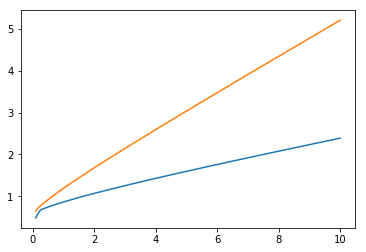

'\nNeed to make sure that the solver starts somewhere with initial consumption, otherwise\nthe solver brings you in the other direction\n'

In [202]:

# Update your guess
p_guess = np.ones(2*len(k))
k = np.linspace(0.1,10,n)

iter = 0

while True:
    iter +=1

    parameters = f, fp, putility, β, p_guess, k
    solve = sp.optimize.root(euler, p_guess, method = "hybr", args = (parameters))
    kprime = solve.x
    print(kprime)
    
    e = np.linalg.norm(kprime - p_guess)
    if e < tol:
        break
    p_guess = kprime
    print("Number of iterations", "\t", iter, "\n", "error", "\t", e)
    #guess = p_guess*1.

# print(Kprime)
plt.plot(k,kprime[:n])
plt.plot(k,kprime[n:])
plt.show()

'''
Need to make sure that the solver starts somewhere with initial consumption, otherwise
the solver brings you in the other direction
'''

#### Polynomial of degree 5

In [203]:
from numpy.polynomial import polynomial as P

# Initial Step: set grid, initial policy and error tolerance
n=200
maxiter = 100
β = 0.9
tol = 1e-6


    
# Policy rule = approximated through piecewise linear approx
def PL(x, k, p_guess):
    c = P.polyfit(k, p_guess, 5)
    return(c[0]*x**0 + c[1]*x + c[2]*x**2 + c[3]*x**3 + c[4]*x**4)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


[0.48047744 0.55345463 0.61410753 0.66734018 0.68553894 0.7001081
 0.71415304 0.72776522 0.7410099  0.75393664 0.76658413 0.77898336
 0.79115954 0.80313421 0.81492478 0.82654666 0.83801304 0.84933546
 0.86052406 0.87158783 0.8825348  0.89337216 0.9041064  0.9147434
 0.92528851 0.93574661 0.94612217 0.95641929 0.96664177 0.9767931
 0.98687653 0.99689507 1.00685152 1.0167485  1.02658845 1.03637365
 1.04610625 1.05578826 1.06542158 1.075008   1.08454918 1.09404674
 1.10350215 1.11291687 1.12229222 1.13162949 1.1409299  1.15019461
 1.15942471 1.16862126 1.17778525 1.18691764 1.19601934 1.20509122
 1.21413411 1.22314882 1.2321361  1.24109669 1.25003129 1.25894058
 1.2678252  1.27668578 1.28552291 1.29433718 1.30312913 1.31189929
 1.32064819 1.32937632 1.33808416 1.34677216 1.35544079 1.36409045
 1.37272158 1.38133458 1.38992982 1.3985077  1.40706857 1.41561279
 1.42414069 1.43265262 1.44114889 1.44962981 1.45809568 1.4665468
 1.47498346 1.48340592 1.49181445 1.50020933 1.50859079 1.51695909

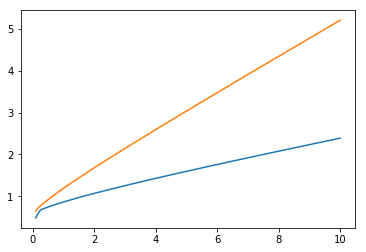

In [204]:

# Update your guess
p_guess = np.ones(2*len(k))
k = np.linspace(0.1,10,n)

iter = 0
while True:
    iter +=1
    parameters = f, fp, putility, β, p_guess, k
    solve = sp.optimize.root(euler, p_guess, method = "hybr", args = (parameters))
    kprime = solve.x
    print(kprime)
    
    e = np.linalg.norm(kprime - p_guess)
    if e < tol:
        break
    p_guess = kprime
    print("Number of iterations", "\t", iter, "\n", "error", "\t", e)
    #guess = p_guess*1.

# print(Kprime)
plt.plot(k,kprime[:n])
plt.plot(k,kprime[n:])
plt.show()

#### Cubic Splines

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


[0.48047744 0.55345463 0.61410753 0.66734018 0.68553894 0.70010809
 0.71415304 0.72776522 0.7410099  0.75393664 0.76658413 0.77898336
 0.79115954 0.80313421 0.81492478 0.82654666 0.83801304 0.84933546
 0.86052406 0.87158783 0.8825348  0.89337216 0.9041064  0.9147434
 0.92528851 0.93574661 0.94612217 0.95641929 0.96664177 0.9767931
 0.98687653 0.99689507 1.00685152 1.0167485  1.02658845 1.03637365
 1.04610625 1.05578826 1.06542158 1.075008   1.08454918 1.09404674
 1.10350215 1.11291687 1.12229222 1.13162949 1.1409299  1.15019461
 1.15942471 1.16862126 1.17778525 1.18691764 1.19601934 1.20509122
 1.21413411 1.22314882 1.2321361  1.24109669 1.25003129 1.25894058
 1.2678252  1.27668578 1.28552291 1.29433718 1.30312913 1.31189929
 1.32064819 1.32937632 1.33808416 1.34677216 1.35544079 1.36409045
 1.37272158 1.38133458 1.38992982 1.3985077  1.40706857 1.41561279
 1.42414069 1.43265262 1.44114889 1.44962981 1.45809568 1.4665468
 1.47498346 1.48340592 1.49181445 1.50020933 1.50859079 1.5169590

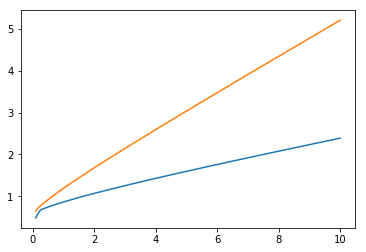

In [206]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Policy rule = approximated through piecewise linear approx
def PL(x, k, p_guess):
    c = CubicSpline(k, p_guess)
    return(c(x))



# Update your guess
p_guess = np.ones(2*len(k))
k = np.linspace(0.1,10,n)

iter = 0
while True:
    iter +=1
    parameters = f, fp, putility, β, p_guess, k
    solve = sp.optimize.root(euler, p_guess, method = "hybr", args = (parameters))
    kprime = solve.x
    print(kprime)
    
    e = np.linalg.norm(kprime - p_guess)
    if e < tol:
        break
    p_guess = kprime
    print("Number of iterations", "\t", iter, "\n", "error", "\t", e)
    #guess = p_guess*1.

# print(Kprime)
plt.plot(k,kprime[:n])
plt.plot(k,kprime[n:])
plt.show()

### AR(1) shocks

Now suppose that $f(k, 1) = exp(A_t) * k^{0.3} + 0.5*k$


And that $A_t = 0.9 A_{t-1} + \epsilon_t$

In [209]:
# Define the shock process
def a(a_old):
    return(0.9*a_old + np.random.standard_normal(1))

# Production function
def f(k, s, a):
    if s == 0:
        return(np.exp(a) * k**(0.3) + 0.5 * k)
    if s == 1:
        return(1.1*k**(0.3) + 0.9*k)

# Derivates of the production functions
def fp(k, s):
    if s == 0:
        return(0.3 * np.exp(a) * np.power(k, 0.3) + 0.5)
    if s == 1:
        return(np.where(k>0, 0.3*1.1*np.power(k, -0.7) + 0.9, 5000))

# U
def utility(x):
    return(np.where(x>0, np.log(x), -5000))
    
# U'
def putility(x):
    return(np.where(x>0, np.divide(1, x), 5000)) 




# Policy rule = approximated through piecewise linear approx
def PL(x, k, p_guess):
    return(np.interp(x, k, p_guess))


# Expected Utility in the future = 0.5 U1 + 0.5 U2
def euler(x, *parameters):
    f, fp, putility, β, p_guess, k, A0 = parameters
    p_guess1 = p_guess[:n]
    p_guess2 = p_guess[n:]
    x1 = x[:n]
    x2 = x[n:]
    
    return np.append(putility(f(k, 0) - x1) - β*(0.5*fp(x1,0)*putility(f(x1, 0) \
                     - PL(x1, k, p_guess1)) + 0.5*fp(x1,1)*putility(f(x1, 1) - PL(x1, k, p_guess1))),
                     putility(f(k, 1) - x2) - β*(0.5*fp(x2,0)*putility(f(x2, 0) \
                     - PL(x2, k, p_guess2)) + 0.5*fp(x2,1)*putility(f(x2, 1) - PL(x2, k, p_guess2))))




In [222]:
n = 5
A0 = 0
k = np.arange(0.01, 10, n)
p_guess = np.zeros((n, n, n))



In [235]:
x = np.linspace(-2.0, 2.0,1000)
X, Y = np.meshgrid(x, x)
Z = (1 - X)**2 + (100)*((Y - X**2)**2)
Z

array([[3609.        , 3589.8016112 , 3570.69272616, ..., 3562.72475819,
        3581.81762721, 3601.        ],
       [3604.1967984 , 3585.0112224 , 3565.91512448, ..., 3557.94715652,
        3577.02723841, 3596.1967984 ],
       [3599.39680321, 3580.22404   , 3561.14072922, ..., 3553.17276125,
        3572.24005602, 3591.39680321],
       ...,
       [ 412.20961602,  405.78558879,  399.42546541, ...,  391.45749744,
         397.80160481,  404.20961602],
       [ 410.60320481,  404.19199038,  397.84465412, ...,  389.87668615,
         396.20800639,  402.60320481],
       [ 409.        ,  402.60159837,  396.26704923, ...,  388.29908126,
         394.61761439,  401.        ]])